In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  2


In [3]:
import numpy as np

#Set the `numpy` pseudo-random generator at a fixed value
#This helps with repeatable results everytime you run the code. 
np.random.seed(1000)

import matplotlib.pyplot as plt
import os
import cv2
from PIL import Image
import keras


In [4]:
images_directory='/kaggle/input/cell-images-for-detecting-malaria/cell_images'

In [5]:
SIZE = 64
dataset = []
label = []

In [6]:
parasitized_images = os.listdir(images_directory + '/Parasitized/')

#iterate through every file in the directory

for i, image_name in enumerate(parasitized_images):
    if (image_name.split('.')[1]=='png'):
        image = cv2.imread(images_directory + '/Parasitized/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(0)

In [7]:
uninfected_images = os.listdir(images_directory + '/Uninfected/')

for i, image_name in enumerate(uninfected_images):
    if (image_name.split('.')[1] == 'png'):
        image = cv2.imread(images_directory + '/Uninfected/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(1)


In [8]:
print ('Shape of parasitized images: ', np.shape(parasitized_images))
print ('Shape of Uninfected images: ', np.shape(uninfected_images))


Shape of parasitized images:  (13780,)
Shape of Uninfected images:  (13780,)


In [9]:
#Apply CNN
# ### Build the model

#############################################################
###2 conv and pool layers. with some normalization and drops in between.

INPUT_SHAPE = (SIZE, SIZE, 3)   #change to (SIZE, SIZE, 3)
inp = keras.layers.Input(shape=INPUT_SHAPE)

conv1 = keras.layers.Conv2D(32, kernel_size=(3, 3), 
                               activation='relu', padding='same')(inp)
pool1 = keras.layers.MaxPooling2D(pool_size=(2, 2))(conv1)
norm1 = keras.layers.BatchNormalization(axis = -1)(pool1)
drop1 = keras.layers.Dropout(rate=0.2)(norm1)
conv2 = keras.layers.Conv2D(32, kernel_size=(3, 3), 
                               activation='relu', padding='same')(drop1)
pool2 = keras.layers.MaxPooling2D(pool_size=(2, 2))(conv2)
norm2 = keras.layers.BatchNormalization(axis = -1)(pool2)
drop2 = keras.layers.Dropout(rate=0.2)(norm2)

flat = keras.layers.Flatten()(drop2)  #Flatten the matrix to get it ready for dense.

hidden1 = keras.layers.Dense(512, activation='relu')(flat)
norm3 = keras.layers.BatchNormalization(axis = -1)(hidden1)
drop3 = keras.layers.Dropout(rate=0.2)(norm3)
hidden2 = keras.layers.Dense(256, activation='relu')(drop3)
norm4 = keras.layers.BatchNormalization(axis = -1)(hidden2)
drop4 = keras.layers.Dropout(rate=0.2)(norm4)

out = keras.layers.Dense(2, activation='sigmoid')(drop4)   #units=1 gives error

model = keras.Model(inputs=inp, outputs=out)
model.compile(optimizer='adam',
                loss='categorical_crossentropy',   #Check between binary_crossentropy and categorical_crossentropy
                metrics=['accuracy'])
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248  

In [10]:
 ### Split the dataset
# 
# I split the dataset into training and testing dataset.
# 1. Training data: 80%
# 2. Testing data: 20%
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(dataset, to_categorical(np.array(label)), test_size = 0.20, random_state = 0)



In [11]:
#Fit the model
model_history = model.fit(np.array(X_train), 
                         y_train, 
                         batch_size = 32, 
                         verbose = 1, 
                         epochs = 50,      #Changed to 3 from 50 for testing purposes.
                         validation_split = 0.1,
                         shuffle = False
                      #   callbacks=callbacks
                     )

Epoch 1/50


2023-12-14 13:12:26.203012: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


621/621 [==============================] - 11s 8ms/step - loss: 0.4588 - accuracy: 0.8048 - val_loss: 0.4734 - val_accuracy: 0.7873
Epoch 2/50
621/621 [==============================] - 5s 7ms/step - loss: 0.2383 - accuracy: 0.9131 - val_loss: 0.1816 - val_accuracy: 0.9442
Epoch 3/50
621/621 [==============================] - 5s 7ms/step - loss: 0.2048 - accuracy: 0.9259 - val_loss: 0.2036 - val_accuracy: 0.9338
Epoch 4/50
621/621 [==============================] - 5s 7ms/step - loss: 0.1836 - accuracy: 0.9340 - val_loss: 0.1838 - val_accuracy: 0.9379
Epoch 5/50
621/621 [==============================] - 5s 8ms/step - loss: 0.1641 - accuracy: 0.9426 - val_loss: 0.1414 - val_accuracy: 0.9492
Epoch 6/50
621/621 [==============================] - 5s 7ms/step - loss: 0.1388 - accuracy: 0.9518 - val_loss: 0.1354 - val_accuracy: 0.9560
Epoch 7/50
621/621 [==============================] - 5s 7ms/step - loss: 0.1188 - accuracy: 0.9589 - val_loss: 0.1561 - val_accuracy: 0.9519
Epoch 8/50
621/6

In [12]:
print("Test_Accuracy: {:.2f}%".format(model.evaluate(np.array(X_test), np.array(y_test))[1]*100))


173/173 [==============================] - 1s 3ms/step - loss: 0.2754 - accuracy: 0.9496
Test_Accuracy: 94.96%


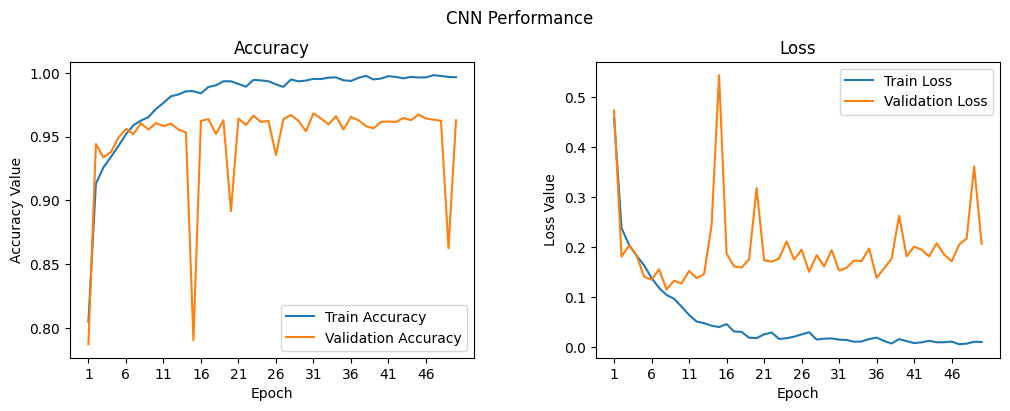

In [13]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

max_epoch = len(model_history.history['accuracy'])+1
epoch_list = list(range(1,max_epoch))
ax1.plot(epoch_list, model_history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, model_history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(1, max_epoch, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, model_history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, model_history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(1, max_epoch, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [14]:
import pickle

# Assuming 'model' is your trained TensorFlow/Keras model
# Training your model and assigning it to the 'model' variable

# ... (your model training code)

# Save the model using pickle
with open('/kaggle/working/malarial_classification_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

In [ ]:
import pickle

# Load the model back using pickle
with open('/kaggle/working/model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

# Use the loaded model for predictions or further operations
# Example:
predictions = loaded_model.predict(test_data)